#### Idea1: Can we improve yield prediction for different crops across different counties in the US? Understanding crop yield data is essential to ensure food security and climate change, and changes in weather patterns are affecting crop yield throughout. The goal of this project is to be able to predict the yield of crops in the US using publicly available datasets on weather, soil quality, amount of crop irrigated and other features. 

#### This project predicts the yield of wheat in different counties in the US. The datasets for this project is from https://github.com/aerialintel/data-science-exercise and includes data for both 2013 and 2014. 


#### The 2013 dataset is loaded here. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
#### Reading in dataset

In [3]:
df1_2013 = pd.read_csv('Wheat2013.csv',header=0)

In [10]:
df1_2013.head(15)

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7
5,Adams,Washington,47.150327,-118.958859,11/30/2013 0:00,30.32,22.40,0.00,28.91,0.91,...,0,1026.87,33.19,28.79,2.85,151,1.37,131.087753,0,35.7
6,Alfalfa,Oklahoma,36.995835,-98.330851,11/30/2013 0:00,61.87,24.98,0.00,33.35,0.72,...,0,1020.65,61.87,29.61,9.70,213,3.22,154.290955,0,14.4
7,Alfalfa,Oklahoma,36.988813,-98.404629,11/30/2013 0:00,61.94,24.74,0.00,33.20,0.72,...,0,1020.64,61.94,29.57,9.72,214,3.13,154.048492,0,14.4
8,Alfalfa,Oklahoma,36.702452,-98.319893,11/30/2013 0:00,61.19,26.95,0.00,35.18,0.75,...,0,1020.74,61.19,31.49,9.58,199,4.43,150.004395,0,14.4
9,Alfalfa,Oklahoma,36.628781,-98.539816,11/30/2013 0:00,61.35,26.87,0.00,35.15,0.73,...,0,1020.73,61.35,32.62,9.76,208,4.42,149.816055,0,14.4


In [7]:
df_adams_WA = df1_2013[df1_2013['CountyName'] == 'Adams']

In [9]:
df_adams_WA

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176544,Adams,Washington,46.811686,-118.695237,6/3/2014 0:00,79.72,60.49,0.03,42.90,0.38,...,0,1008.99,81.83,60.49,10.00,235,7.67,160.802017,185,35.7
176545,Adams,Washington,47.162342,-118.699677,6/3/2014 0:00,79.01,57.59,0.14,45.28,0.46,...,0,1009.01,79.01,57.59,9.97,253,2.25,160.269257,185,35.7
176546,Adams,Washington,46.929839,-118.352109,6/3/2014 0:00,79.27,58.71,0.07,44.49,0.44,...,0,1009.24,79.27,58.71,9.99,223,5.10,158.174454,185,35.7
176547,Adams,Washington,47.006888,-118.510160,6/3/2014 0:00,78.38,57.62,0.15,45.69,0.47,...,0,1009.08,78.38,57.62,9.96,242,2.26,155.593247,185,35.7


In [5]:
df1_2013.groupby(['State'])['Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Kansas,55800.0,33.702000,11.566218,12.1,25.8,32.4,44.8,59.0
Montana,19480.0,43.481899,9.318131,32.3,37.8,40.9,48.4,68.5
Oklahoma,33941.0,20.059362,10.560151,10.2,14.0,16.5,22.0,69.0
Texas,58228.0,29.242950,16.870902,9.0,14.4,24.2,42.4,72.2
Washington,10044.0,46.766667,11.904840,31.3,35.7,43.7,52.4,66.0


### Exploring data in Texas



In [6]:
df_Tex= df1_2013[df1_2013['State'] == 'Texas']

In [7]:
df_Tex.groupby('CountyName')['Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
CountyName,,,,,,,,
Archer,1116.0,13.1,2.434700e-13,13.1,13.1,13.1,13.1,13.1
Armstrong,1116.0,13.8,2.736816e-13,13.8,13.8,13.8,13.8,13.8
Bailey,1116.0,21.4,2.843445e-13,21.4,21.4,21.4,21.4,21.4
Baylor,1116.0,16.5,0.000000e+00,16.5,16.5,16.5,16.5,16.5
Bell,1108.0,52.2,9.738831e-13,52.2,52.2,52.2,52.2,52.2
Bexar,1116.0,31.5,0.000000e+00,31.5,31.5,31.5,31.5,31.5
Bosque,750.0,27.1,7.821186e-14,27.1,27.1,27.1,27.1,27.1
Brown,388.0,13.6,3.201571e-14,13.6,13.6,13.6,13.6,13.6
Callahan,1116.0,11.5,0.000000e+00,11.5,11.5,11.5,11.5,11.5


### Exploring data in Washington

In [8]:
df_Wash = df1_2013[df1_2013['State'] == 'Washington']

In [9]:
df_Wash.shape

(10044, 26)

In [10]:
df_Wash.groupby('CountyName')['Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
CountyName,,,,,,,,
Adams,1116.0,35.7,9.952058e-14,35.7,35.7,35.7,35.7,35.7
Asotin,1116.0,52.4,9.738800e-13,52.4,52.4,52.4,52.4,52.4
Columbia,1116.0,66.0,0.000000e+00,66.0,66.0,66.0,66.0,66.0
Douglas,1116.0,35.3,6.397752e-14,35.3,35.3,35.3,35.3,35.3
Franklin,1116.0,31.3,2.985617e-13,31.3,31.3,31.3,31.3,31.3
Garfield,1116.0,65.6,2.985617e-13,65.6,65.6,65.6,65.6,65.6
Grant,1116.0,42.9,8.672508e-13,42.9,42.9,42.9,42.9,42.9
Klickitat,1116.0,43.7,6.113407e-13,43.7,43.7,43.7,43.7,43.7
Lincoln,1116.0,48.0,0.000000e+00,48.0,48.0,48.0,48.0,48.0


### Plotting all the datapoints on a basemap

In [12]:
usa = gpd.read_file('./states_21basic/states.shp')

In [13]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [14]:
usa.drop(usa[usa['STATE_NAME'] =='Alaska'].index, inplace=True)

In [15]:
usa.drop(usa[usa['STATE_NAME'] =='Hawaii'].index, inplace=True)

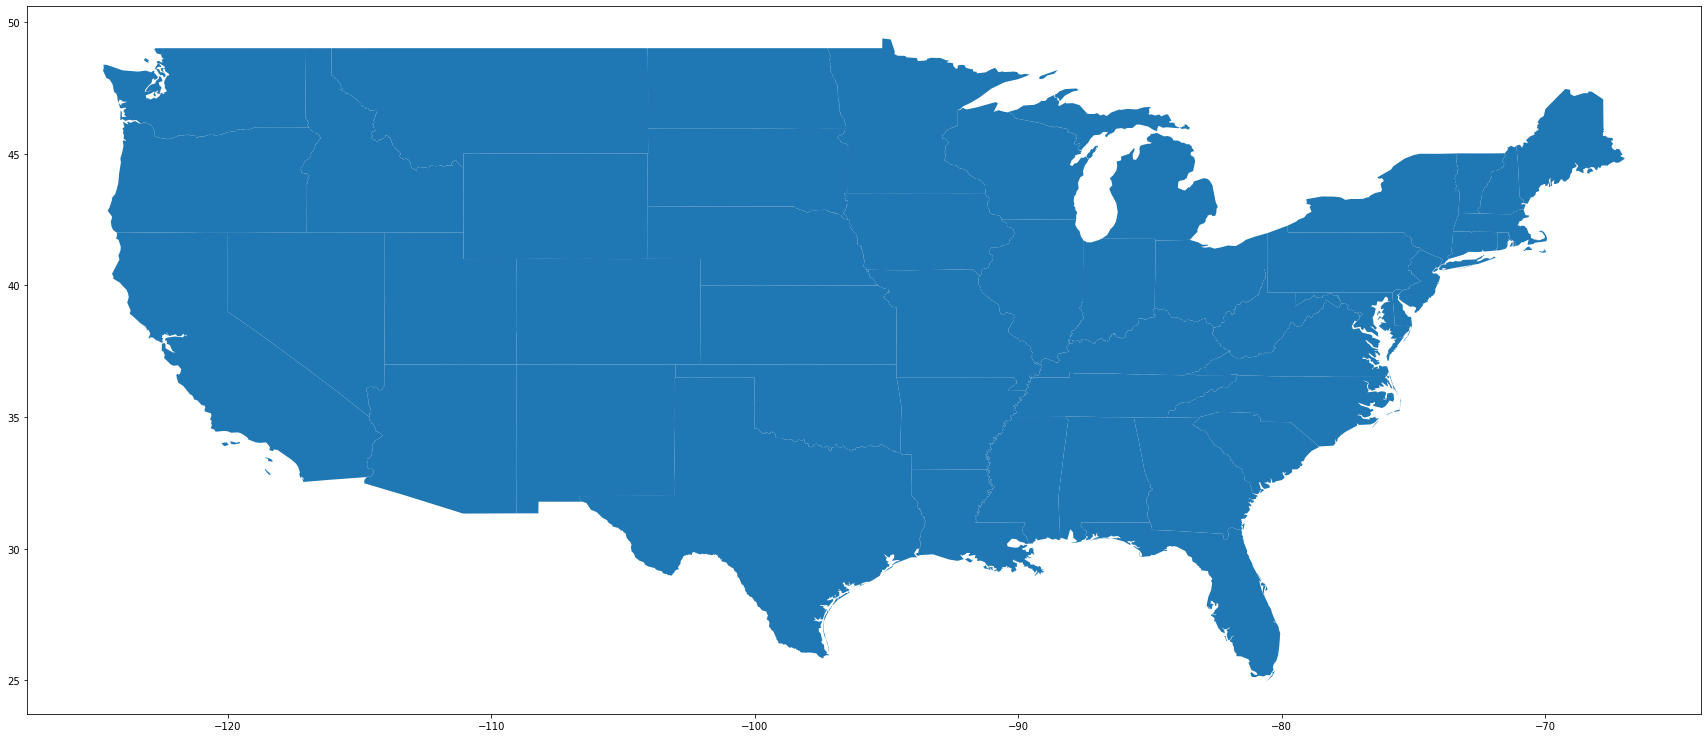

In [16]:
fig, ax = plt.subplots(figsize = (30,30))
usa.plot(ax=ax)

In [17]:
#Set the Coordinate Reference System for the dataframe

In [18]:
crs = {'init': 'epsg:4326'}

In [19]:
geometry = [Point(xy) for xy in zip(df1_2013['Longitude'], df1_2013['Latitude'])]

In [20]:
len(geometry)

177493

In [21]:
geo_df = gpd.GeoDataFrame(df1_2013, crs = crs, geometry = geometry)

In [22]:
geo_df.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield,geometry
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7,POINT (-118.69524 46.81169)
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7,POINT (-118.35211 46.92984)
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7,POINT (-118.51016 47.00689)
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7,POINT (-118.69968 47.16234)
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7,POINT (-118.43406 47.15751)


In [ ]:
fig, ax = plt.subplots(figsize = (30,30))
usa.plot(ax=ax, alpha = 0.1, color='grey')
geo_df[geo_df['State'] == 'Washington'].plot(ax = ax, color = 'blue', marker = 'o', markersize = 10)

geo_df[geo_df['State'] == 'Texas'].plot(ax = ax, color = 'darkgrey', marker = "^", markersize = 10)

geo_df[geo_df['State'] == 'Montana'].plot(ax = ax, color = 'black', marker = "*", markersize = 10)

geo_df[geo_df['State'] == 'Kansas'].plot(ax = ax, color = 'green', marker = ".", markersize = 10)

geo_df[geo_df['State'] == 'Texas'].plot(ax = ax, color = 'red', marker = "+", markersize = 10)
